In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("online_retail.csv")

In [5]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom

In [7]:
data['total_price'] = data['Quantity']*data['UnitPrice']

In [9]:
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  \
0       2022-12-01 08:26:00       2.55     17850.0  United Kingdom   
1       2022-12-01 08:26:00       3.39     17850.0  United Kingdom   
2       2022-12-01 08:26:00       2.75     17850.0  United Kingdom   
3       2022-12-01 08:26:00       3.39     17850.0  United Kingdom   
4       2022-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                     ...        ...         ...             ...   
541904  2023-12-09 12:50:00       0.85     12680.0          France   
541905  2023-12-09 12:50:00       2.10     12680.0          France   
541906  2023-12-09 12:50:00       4.15     12680.0          France   
541907  2023-12-09 12:50:00       4.15     12680.0          France   
541908  2023-12-09 12:50:00       4.95     12680.0          France   

        total_price  
0             15.30  
1             20.34  
2             22.00  
3             20.34  
4             20.34  
...             ...  
541904        10.20  
541905        12.60  
541906        16.60  
541907        16.60  
541908        14.85  

[541909 rows x 9 columns]

In [147]:
data['Description'].nunique()

3877

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   total_price  541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [13]:
data.duplicated().sum()

5268

In [14]:
data = data.drop_duplicates()

In [16]:
data.duplicated().sum()

0

In [19]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
total_price         0
dtype: int64

In [21]:
data = data.dropna()

In [23]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
total_price    0
dtype: int64

In [26]:
# 1. Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

In [28]:
# 2. Exclude cancelled invoices (InvoiceNo starting with 'C')
data = data[data['InvoiceNo'].astype(str).str.startswith('C') == False]

In [30]:
# 3. Remove rows with negative or zero Quantity or UnitPrice
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [32]:
#  Reset index 
data = data.reset_index(drop=True)

In [34]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  total_price  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34

## Exploratory Data Analysis (EDA)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

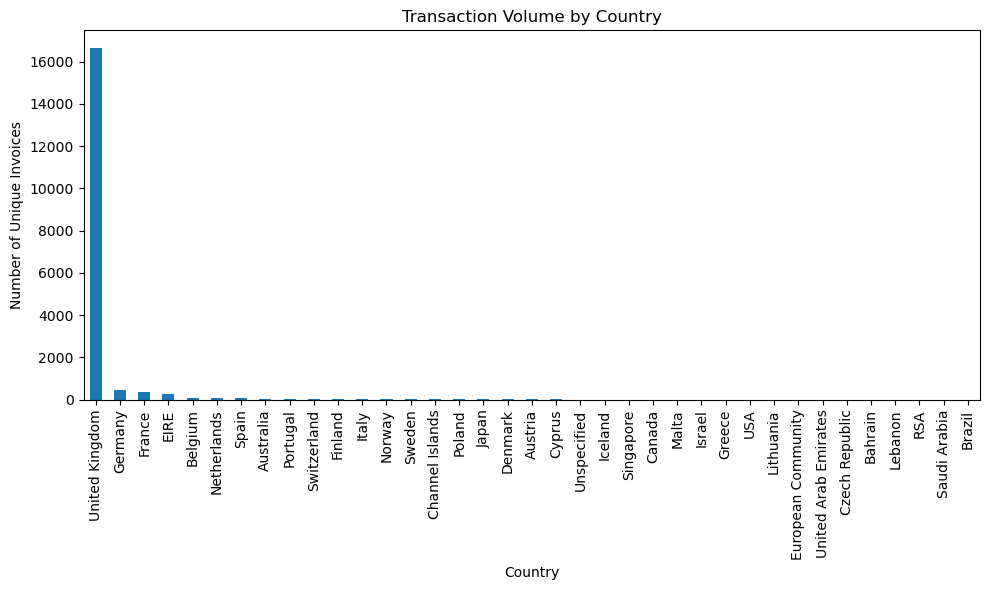

In [39]:
# 1. Transaction volume by country
volume_by_country = data.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
volume_by_country.plot(kind='bar')
plt.title('Transaction Volume by Country')
plt.ylabel('Number of Unique Invoices')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

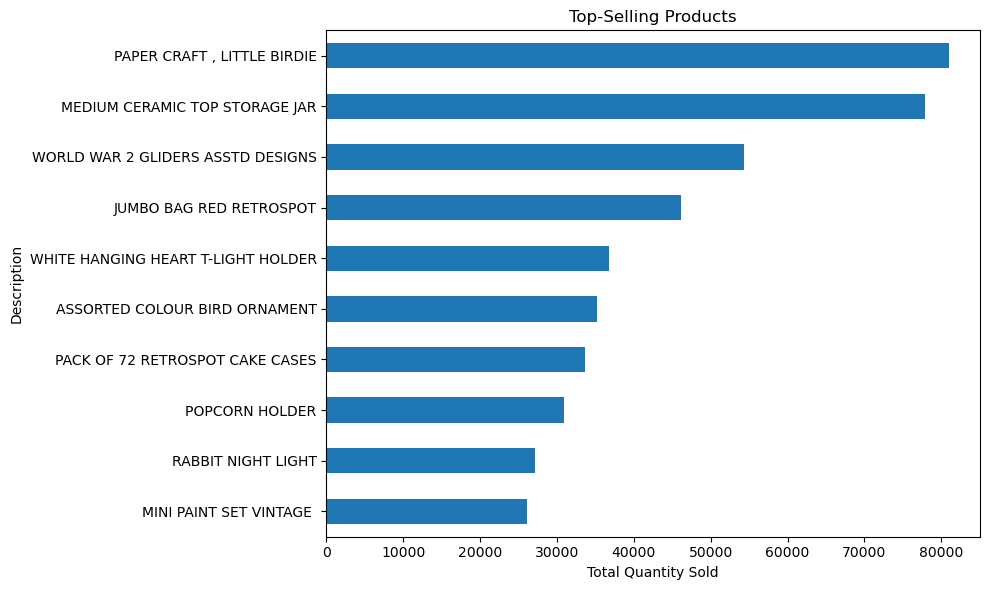

In [42]:
# 2. Top-selling products
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.title('Top-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

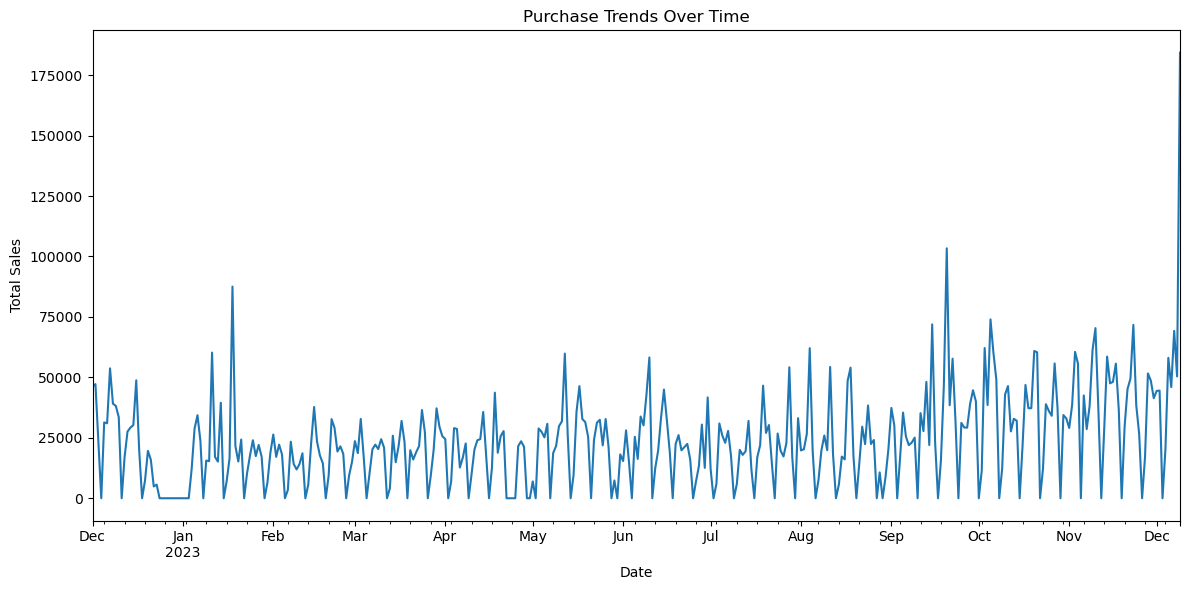

In [46]:
# 3. Purchase trends over time
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
daily_sales = data.set_index('InvoiceDate').resample('D')['total_price'].sum() #'D' stands for daily ,this splits the data into daily bins
                                                                           #based on the index (InvoiceDate), so we can apply aggregations to each day.
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Purchase Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

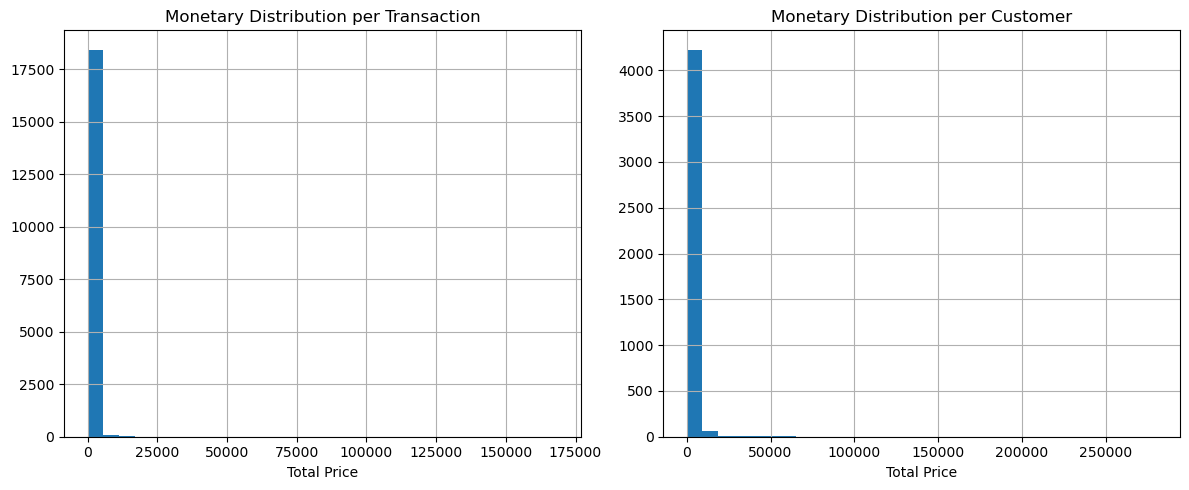

In [49]:
# 4. Monetary distribution per transaction and customer
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data.groupby('InvoiceNo')['total_price'].sum().hist(bins=30)
plt.title('Monetary Distribution per Transaction')
plt.xlabel('Total Price')

plt.subplot(1, 2, 2)
data.groupby('CustomerID')['total_price'].sum().hist(bins=30)
plt.title('Monetary Distribution per Customer')
plt.xlabel('Total Price')
plt.tight_layout()
plt.show()

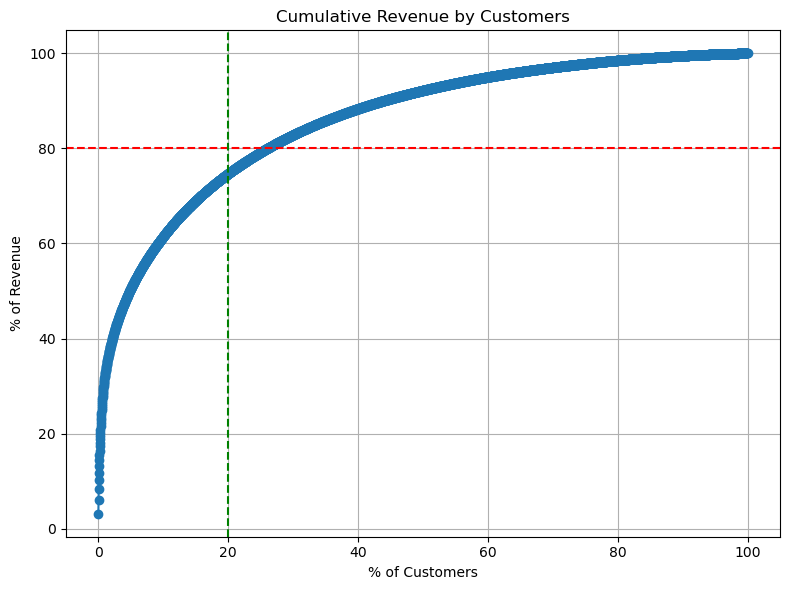

In [52]:
# 5.What % of customers generate what % of revenue?
# Calculate total revenue per customer sorted descending
customer_revenue = data.groupby('CustomerID')['total_price'].sum().sort_values(ascending=False)
# Calculate cumulative revenue as a fraction of total revenue
cumulative_revenue = customer_revenue.cumsum() / customer_revenue.sum()
# Normalize index (customers)
cumulative_percent_customers = cumulative_revenue.reset_index(drop=True).index / len(cumulative_revenue)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(cumulative_percent_customers * 100, cumulative_revenue.values * 100, marker='o')
plt.title('Cumulative Revenue by Customers')
plt.xlabel('% of Customers')
plt.ylabel('% of Revenue')
plt.grid(True)
plt.axhline(80, color='r', linestyle='--')
plt.axvline(20, color='g', linestyle='--')
plt.tight_layout()
plt.show()

In [54]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  total_price  
0 2022-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2022-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2022-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2022-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2022-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   total_price  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


## Clustering

###  Feature Engineering:

In [60]:
# Set snapshot date as one day after the latest purchase date in the dataset
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

In [62]:
# Group by CustomerID and calculate R, F, M
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'total_price': 'sum'                                      # Monetary
})

In [64]:
# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'total_price': 'Monetary'
}, inplace=True)

In [66]:
rfm.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40

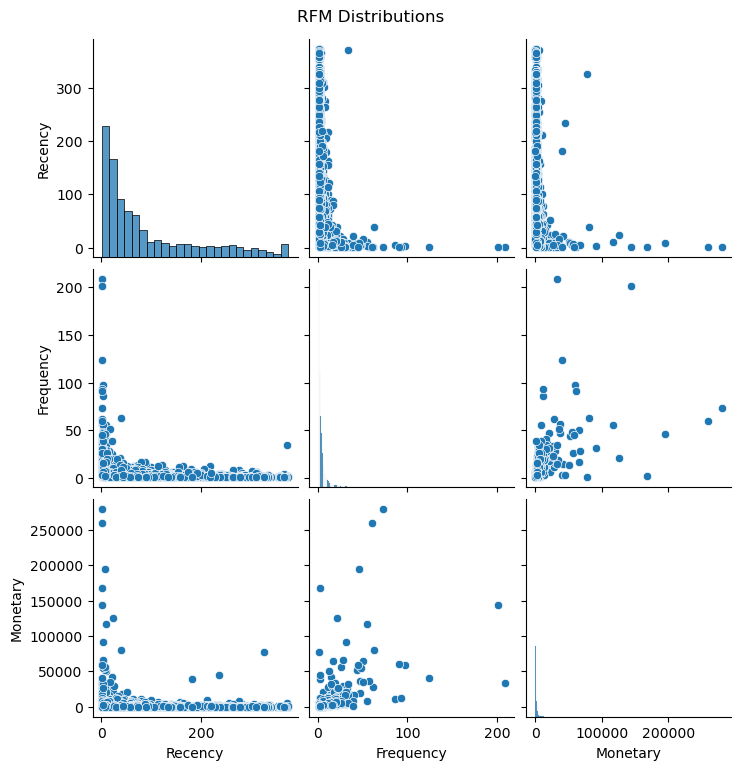

In [68]:
# RFM Analysis
sns.pairplot(rfm)
plt.suptitle("RFM Distributions", y=1.02)
plt.show()

###  Standardize/Normalize the RFM values

In [71]:
# Copy to preserve original
rfm_scaled = rfm.copy()

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_scaled)
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

In [76]:
rfm_scaled.head()

Recency  Frequency  Monetary
CustomerID                               
12346.0     2.334574  -0.425097  8.363010
12347.0    -0.905340   0.354417  0.251699
12348.0    -0.175360  -0.035340 -0.027988
12349.0    -0.735345  -0.425097 -0.032406
12350.0     2.174578  -0.425097 -0.190812

In [105]:
rfm_scaled.to_csv("rfm_scaled.csv")

### Perform K-Means Clustering

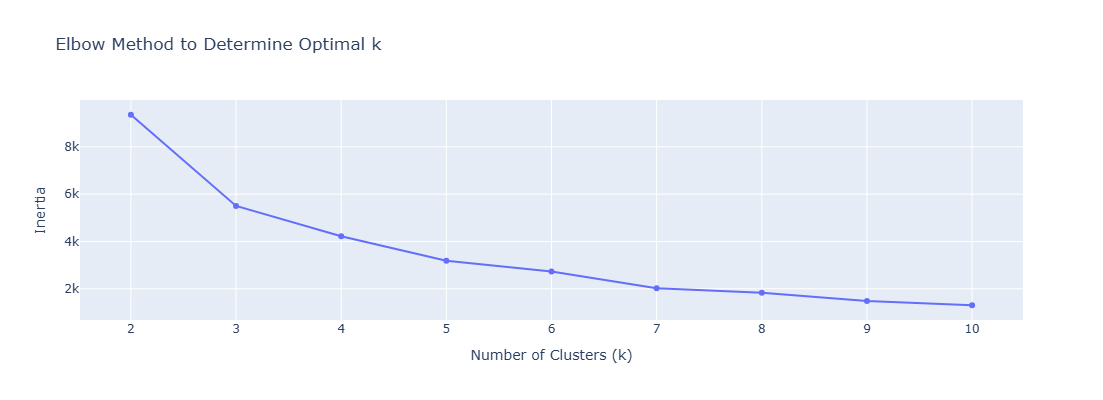

In [78]:
# Elbow Method to Find Optimal k (Number of Clusters)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px

k = range(2, 11)

inertia = []

for i in k:
    km = KMeans(n_clusters= i)
    km.fit(rfm_scaled)
    inertia.append(km.inertia_)

px.line(
    x = k,
    y = inertia,
    labels={'x': 'Number of Clusters (k)', 'y': 'Inertia'},
    title='Elbow Method to Determine Optimal k',
    width= 1000,
    height= 400,
    markers= True

)


In [80]:
from sklearn.metrics import silhouette_score

k_values = list(range(2, 11))
inertia = []
silhouette = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, labels))

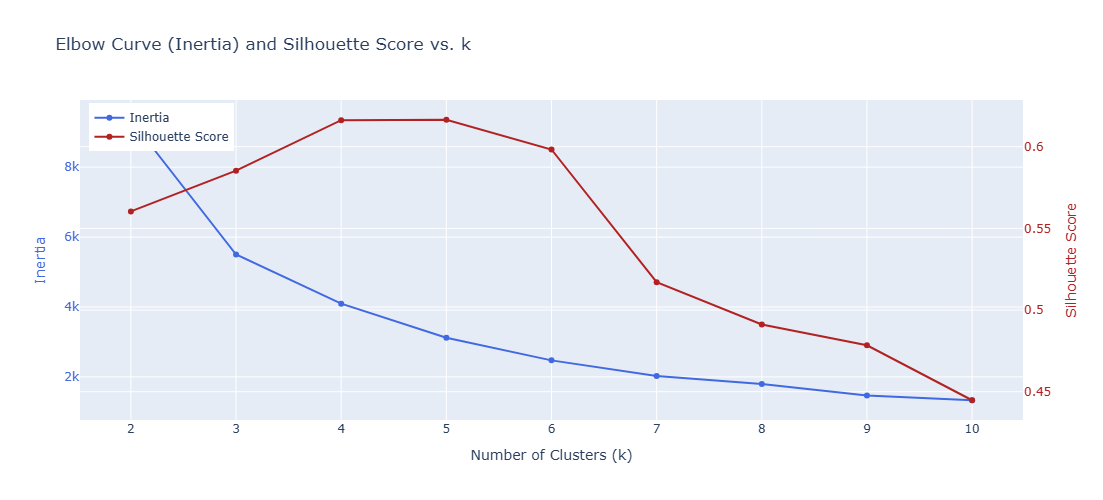

In [82]:
import plotly.graph_objects as go

fig = go.Figure()

# Add Inertia trace
fig.add_trace(go.Scatter(
    x=k_values, y=inertia, mode='lines+markers', name='Inertia',
    yaxis='y1', line=dict(color='royalblue')
))

# Add Silhouette Score trace
fig.add_trace(go.Scatter(
    x=k_values, y=silhouette, mode='lines+markers', name='Silhouette Score',
    yaxis='y2', line=dict(color='firebrick')
))

# Set layout with dual y-axes
fig.update_layout(
    title='Elbow Curve (Inertia) and Silhouette Score vs. k',
    xaxis=dict(title='Number of Clusters (k)'),
    yaxis=dict(
        title='Inertia',
        titlefont=dict(color='royalblue'),
        tickfont=dict(color='royalblue')
    ),
    yaxis2=dict(
        title='Silhouette Score',
        titlefont=dict(color='firebrick'),
        tickfont=dict(color='firebrick'),
        overlaying='y',
        side='right'
    ),
    width=1000,
    height=500,
    legend=dict(x=0.01, y=0.99)
)

fig.show()


In [84]:
# Final model with chosen k

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [86]:
# Cluster profiling
cluster_profile = rfm.groupby('Cluster').mean().reset_index()
print(cluster_profile)

   Cluster     Recency  Frequency       Monetary
0        0   43.702685   3.682711    1353.625312
1        1  248.075914   1.552015     478.848773
2        2    7.384615  82.538462  127187.959231
3        3   15.500000  22.333333   12690.500392


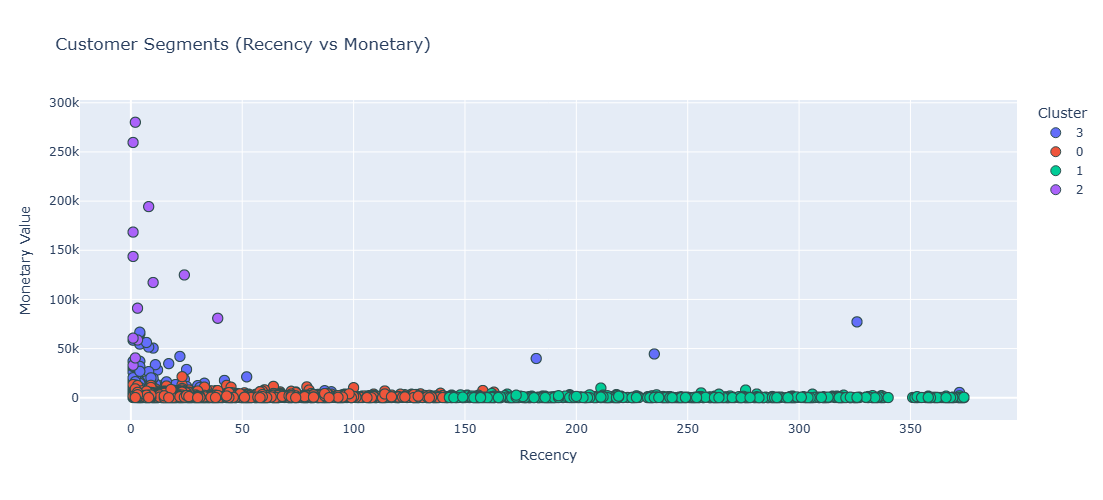

In [88]:
fig = px.scatter(
    data_frame=rfm,
    x='Recency',
    y='Monetary', 
    color=rfm['Cluster'].astype(str),  # Convert cluster labels to string for discrete coloring
    title='Customer Segments (Recency vs Monetary)',
    labels={'Recency': 'Recency', 'Monetary': 'Monetary Value'},
    width=1000,
    height=500
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(legend_title_text='Cluster')
fig.show()

### Agglomerative clustering

In [90]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

In [92]:
# Agglomerative Clustering 
agg = AgglomerativeClustering(n_clusters=4)
rfm_scaled['Cluster_Agg'] = agg.fit_predict(rfm_scaled)

# Evaluate
sil_score_agg = silhouette_score(rfm_scaled, rfm_scaled['Cluster_Agg'])
print(f"Agglomerative Clustering Silhouette Score: {sil_score_agg:.2f}")

Agglomerative Clustering Silhouette Score: 0.67


### DBSCAN Clustering

In [96]:
dbscan = DBSCAN(eps=1.5, min_samples=4)
rfm_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(rfm_scaled)

In [104]:
# Show assigned cluster labels
print(rfm_scaled[['Cluster_DBSCAN']])

            Cluster_DBSCAN
CustomerID                
12346.0                 -1
12347.0                  0
12348.0                  0
12349.0                  0
12350.0                  0
...                    ...
18280.0                  0
18281.0                  0
18282.0                  0
18283.0                  1
18287.0                  0

[4338 rows x 1 columns]


In [106]:
#  Check label distribution
print(rfm_scaled['Cluster_DBSCAN'].value_counts())

Cluster_DBSCAN
 0    4176
 1     131
-1      23
 2       4
 3       4
Name: count, dtype: int64


In [102]:
# Silhouette Score 
labels = rfm_scaled['Cluster_DBSCAN']
if len(set(labels)) > 1 and len(set(labels)) != 1 + (labels == -1).sum():
    mask = labels != -1
    sil_score = silhouette_score(rfm_scaled.loc[mask, ['Recency', 'Frequency', 'Monetary']],
                                 labels[mask])
    print(f"\nSilhouette Score: {sil_score:.2f}")
else:
    print("\n⚠️ Not enough clusters (or all noise) for silhouette score.")


Silhouette Score (excluding noise): 0.59


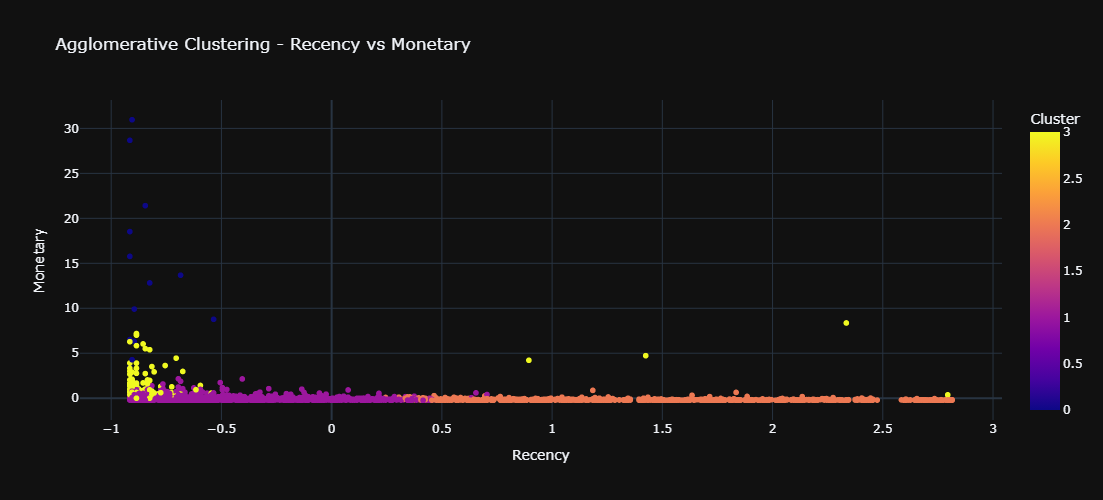

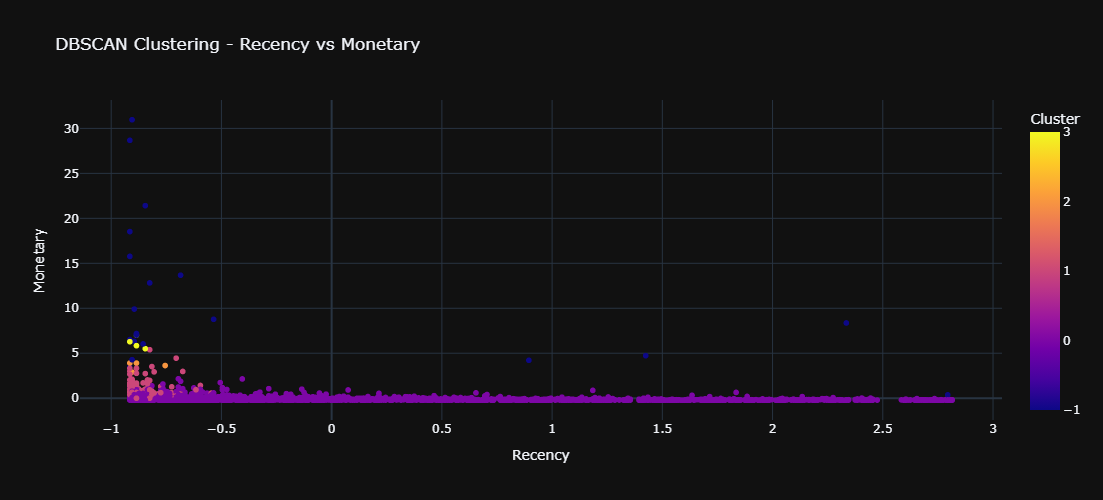

In [120]:
import plotly.express as px

# Agglomerative Clustering Plot
fig1 = px.scatter(
    rfm_scaled,
    x='Recency',
    y='Monetary',
    color='Cluster_Agg',  # ✅ Correct column name
    title='Agglomerative Clustering - Recency vs Monetary',
    labels={'Cluster_Agg': 'Cluster'},
    template='plotly_dark',
    width=700,
    height=500
)
fig1.show()

# DBSCAN Clustering Plot
fig2 = px.scatter(
    rfm_scaled,
    x='Recency',
    y='Monetary',
    color='Cluster_DBSCAN',  # ✅ Also double-check this column name
    title='DBSCAN Clustering - Recency vs Monetary',
    labels={'Cluster_DBSCAN': 'Cluster'},
    template='plotly_dark',
    width=700,
    height=500
)
fig2.show()


### Cluster Labelling

In [110]:
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
cluster_summary['Count'] = rfm['Cluster'].value_counts().sort_index()
cluster_summary.reset_index(inplace=True)

print(cluster_summary)

   Cluster  Recency  Frequency   Monetary  Count
0        0    43.70       3.68    1353.63   3054
1        1   248.08       1.55     478.85   1067
2        2     7.38      82.54  127187.96     13
3        3    15.50      22.33   12690.50    204


In [112]:
cluster_labels = {
    0: 'Regular',
    1: 'At-Risk',
    2: 'High-Value',
    3: 'Potential Loyalist'
}

In [114]:
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

# Labeled Summary
labeled_summary = (
    rfm.groupby(['Cluster', 'Segment'])[['Recency', 'Frequency', 'Monetary']]
    .mean()
    .round(2)
    .reset_index()
)

labeled_summary


Cluster             Segment  Recency  Frequency   Monetary
0        0             Regular    43.70       3.68    1353.63
1        1             At-Risk   248.08       1.55     478.85
2        2          High-Value     7.38      82.54  127187.96
3        3  Potential Loyalist    15.50      22.33   12690.50

### Saving the best model

In [139]:
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the KMeans model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


##  Item-Based Collaborative Filtering with Product Names

In [129]:
from sklearn.metrics.pairwise import cosine_similarity

# Build Customer-Product Matrix (using Quantity)
product_matrix = data.pivot_table(index='CustomerID',
                                columns='Description',
                                values='Quantity',
                                aggfunc='sum',
                                fill_value=0)

#Transpose to get Item-Customer matrix
item_matrix = product_matrix.T

#Compute cosine similarity between products
similarity_matrix = pd.DataFrame(
    cosine_similarity(item_matrix),
    index=item_matrix.index,
    columns=item_matrix.index
)

### Recommendation function

In [132]:
def recommend_products(product_name, top_n=5):
    if product_name not in similarity_matrix.columns:
        return f" Product '{product_name}' not found in dataset."

    # Drop itself and sort by similarity score
    similar_scores = similarity_matrix[product_name].drop(product_name)
    top_similar = similar_scores.sort_values(ascending=False).head(top_n)

    return top_similar


In [136]:
# Recommending products similar to a known product
product_to_check = "WHITE HANGING HEART T-LIGHT HOLDER"
recommendations = recommend_products(product_to_check)

print(f"Products similar to '{product_to_check}':\n")
print(recommendations)


Products similar to 'WHITE HANGING HEART T-LIGHT HOLDER':

Description
GIN + TONIC DIET METAL SIGN         0.750192
RED HANGING HEART T-LIGHT HOLDER    0.658714
WASHROOM METAL SIGN                 0.643520
LAUNDRY 15C METAL SIGN              0.642200
GREEN VINTAGE SPOT BEAKER           0.631463
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64


In [141]:
#saving similarity matrix to a pickle file
with open('similarity_matrix.pkl', 'wb') as f:
    pickle.dump(similarity_matrix, f)

### Product similarity heatmap 

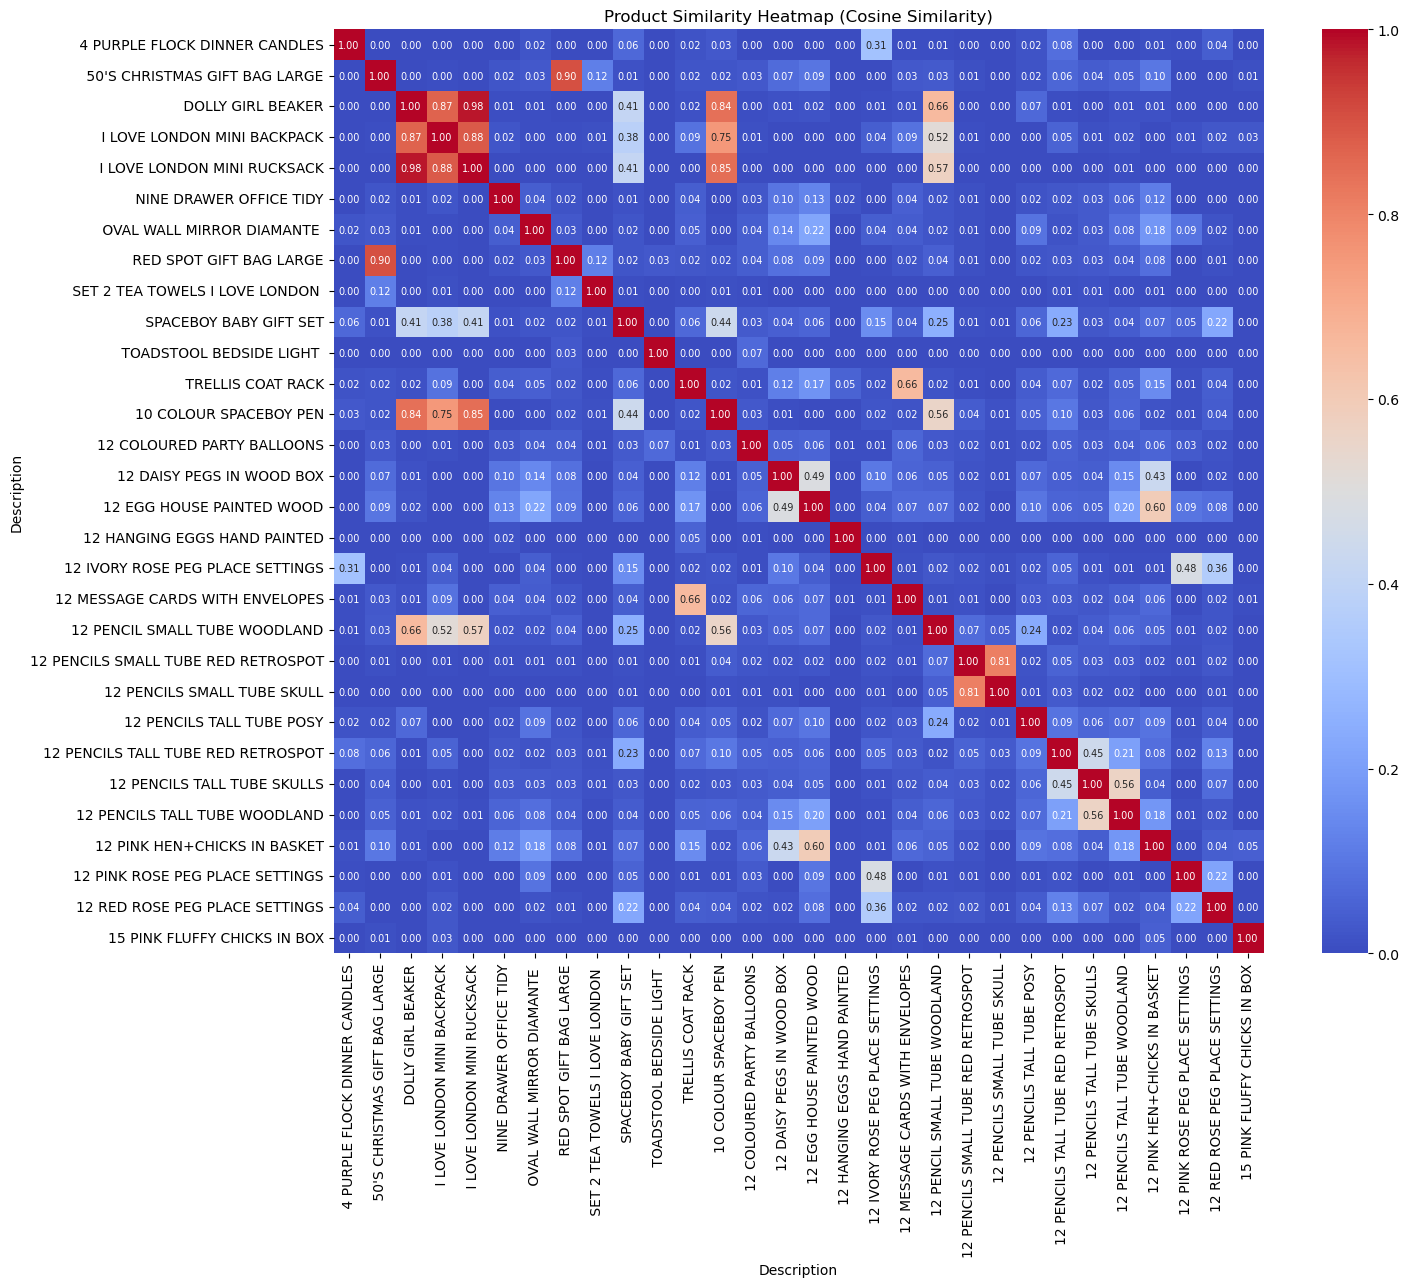

In [151]:
# Create Customer-Product matrix (pivot table)
customer_product = data.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Compute cosine similarity between products (columns)
product_similarity = cosine_similarity(customer_product.T)

# Convert similarity matrix to DataFrame for readability
similarity_matrix = pd.DataFrame(product_similarity, index=customer_product.columns, columns=customer_product.columns)

# 4. Plot heatmap of similarity matrix (showing top 30 products for clarity)
plt.figure(figsize=(15, 12))
top_products = similarity_matrix.columns[:30]  # top 30 products for plotting
sns.heatmap(
    similarity_matrix.loc[top_products, top_products], 
    cmap='coolwarm', 
    annot=True,            
    fmt=".2f",             
    annot_kws={"size": 7} 
)
plt.title('Product Similarity Heatmap (Cosine Similarity)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()